In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Introduction

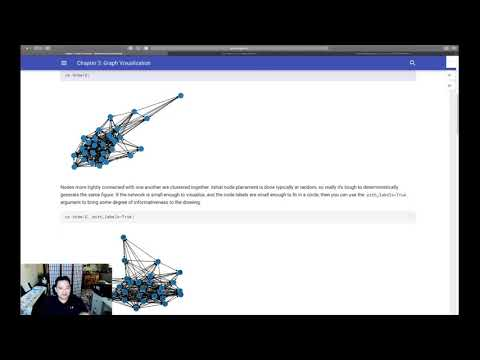

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo(id="v9HrR_AF5Zc", width="100%")

In this chapter, We want to introduce you to the wonderful world of graph visualization.

You probably have seen graphs that are visualized as hairballs.
Apart from communicating how complex the graph is,
hairballs don't really communicate much else.
As such, my goal by the end of this chapter is 
to introduce you to what I call _rational graph visualization_.

But before we can do that, let's first make sure we understand
how to use NetworkX's drawing facilities to draw graphs to the screen.
In a pinch, and for small graphs, it's very handy to have.

## Hairballs

The node-link diagram is the canonical diagram we will see in publications.
Nodes are commonly drawn as circles, while edges are drawn s lines.

Node-link diagrams are common,
and there's a good reason for this: it's convenient to draw!
In NetworkX, we can draw node-link diagrams using:

In [6]:
# from nams import load_data as cf
import sys
if r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple\nams' not in sys.path:
    sys.path.insert(0, r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple\nams')
else: 
    None
import load_data as cf
import networkx as nx
import matplotlib.pyplot as plt

G = cf.load_seventh_grader_network()

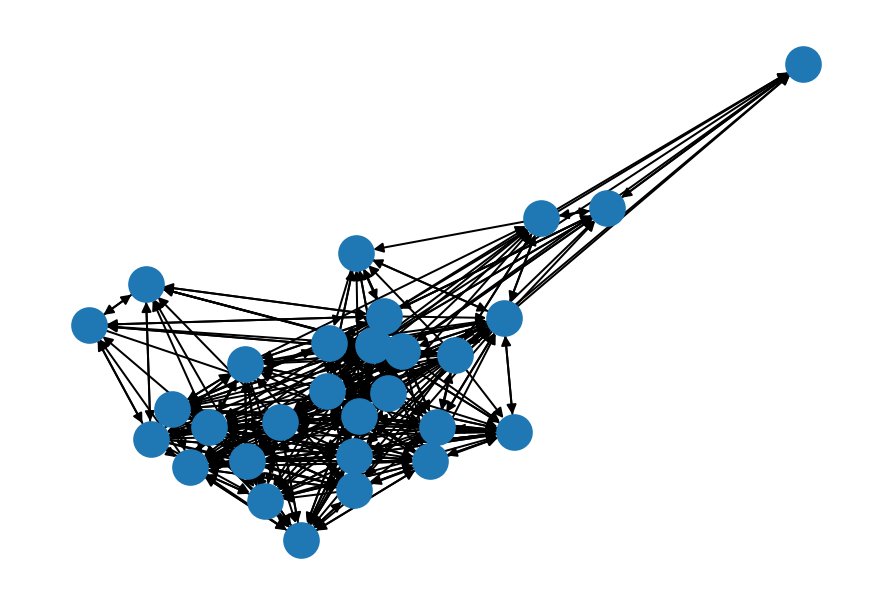

In [8]:
nx.draw(G)

Nodes more tightly connected with one another are clustered together. 
Initial node placement is done typically at random,
so really it's tough to deterministically generate the same figure.
If the network is small enough to visualize,
and the node labels are small enough to fit in a circle,
then you can use the `with_labels=True` argument
to bring some degree of informativeness to the drawing:

In [9]:
G.is_directed()

True

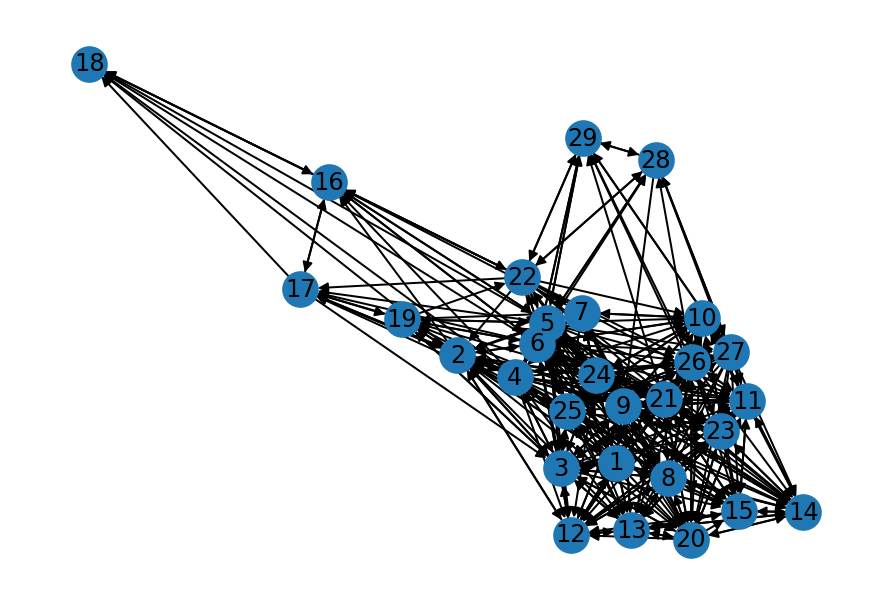

In [10]:
nx.draw(G, with_labels=True)

The downside to drawing graphs this way is that
large graphs end up looking like hairballs.
Can you imagine a graph with more than the 28 nodes that we have?
As you probably can imagine, the default `nx.draw(G)`
is probably not suitable for generating visual insights.

## Matrix Plot

A different way that we can visualize a graph is by visualizing it in its matrix form.
The nodes are on the x- and y- axes, and a filled square represent an edge between the nodes.

We can draw a graph's matrix form conveniently by using `nxviz.MatrixPlot`:

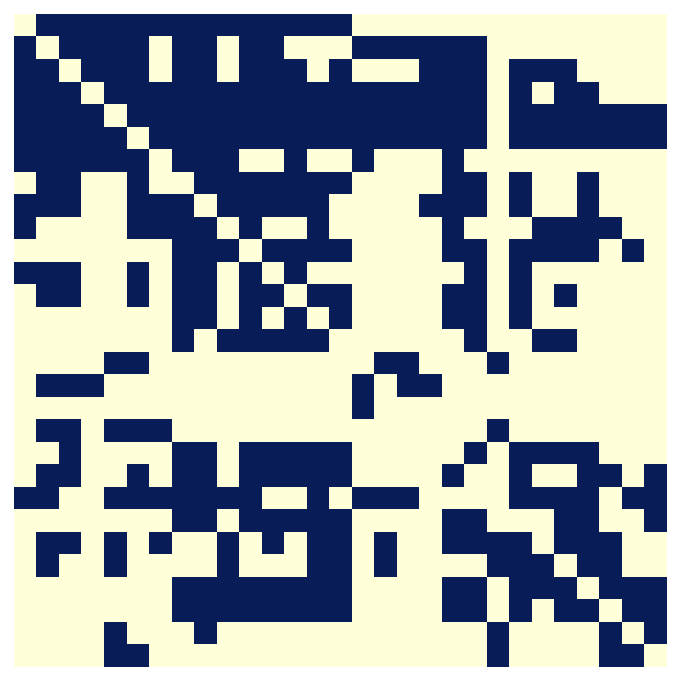

In [16]:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()
plt.show()

# note that the directed graph is not symm 
# There is no self loop (nothing on diagonal)

In [12]:
import nxviz as nv 
from nxviz import annotate


nv.matrix(G, group_by="gender", node_color_by="gender")
annotate.matrix_group(G, group_by="gender")

ImportError: cannot import name 'annotate' from 'nxviz' (C:\Users\pui_s\AppData\Local\Programs\Python\Python39\lib\site-packages\nxviz\__init__.py)

What can you tell from the graph visualization?
A few things are immediately obvious:

- The diagonal is empty: no student voted for themselves as their favourite.
- The matrix is asymmetric about the diagonal: this is a directed graph!

(An undirected graph would be symmetric about the diagonal.)

You might go on to suggest that there is some clustering happening,
but without applying a proper clustering algorithm on the adjacency matrix,
we would be hard-pressed to know for sure.
After all, we can simply re-order the node ordering along the axes
to produce a seemingly-random matrix.

## Arc Plot

The Arc Plot is another rational graph visualization.
Here, we line up the nodes along a horizontal axis,
and draw _arcs_ between nodes if they are connected by an edge.
We can also optionally group and colour them by some metadata.
In the case of this student graph,
we group and colour them by "gender".

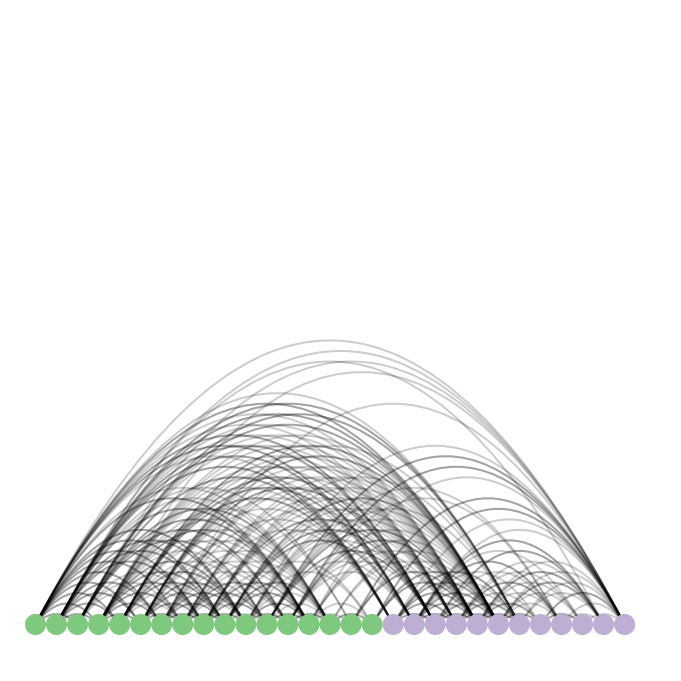

In [23]:
# a = ArcPlot(G, node_color='gender', node_grouping='gender')
# nv.arc(G, node_color_by="gender", group_by="gender")
# annotate.arc_group(G, group_by="gender")

a = nv.ArcPlot(G, node_color="gender", node_grouping="gender")
a.draw()

The Arc Plot forms the basis of the next visualization,
the highly popular Circos plot.

## Circos Plot

The Circos Plot was developed by [Martin Krzywinski][bccrc] at the BC Cancer Research Center. The `nxviz.CircosPlot` takes inspiration from the original by joining the two ends of the Arc Plot into a circle. Likewise, we can colour and order nodes by node metadata:

[bccrc]: http://circos.ca/

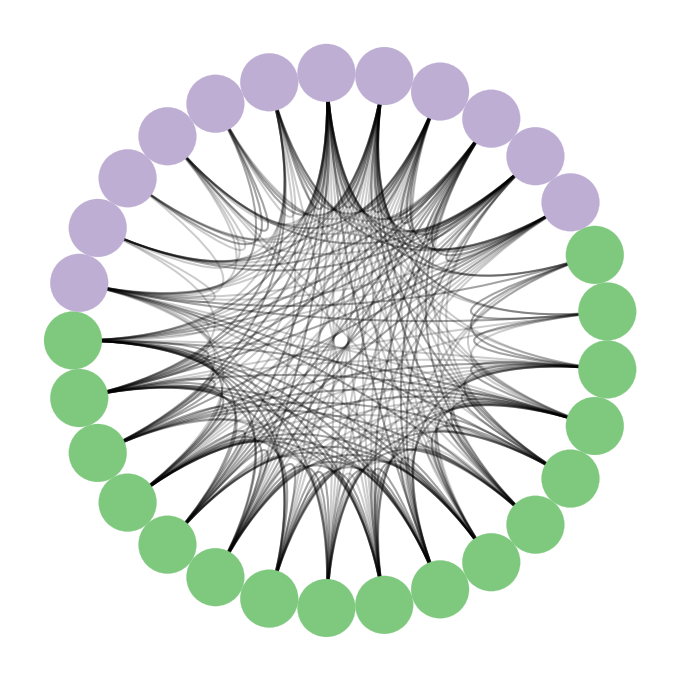

In [25]:
# nv.circos(G, group_by="gender", node_color_by="gender")
# annotate.circos_group(G, group_by="gender")

c = nv.CircosPlot(G, node_color='gender', node_grouping='gender')
c.draw()
plt.show()

Generally speaking, you can think of a Circos Plot as being
a more compact and aesthetically pleasing version of Arc Plots.

## Hive Plot

The final plot we'll show is, Hive Plots.

In [24]:
from nxviz import plots
import matplotlib.pyplot as plt 

nv.hive(G, group_by="gender", node_color_by="gender")
annotate.hive_group(G, group_by="gender")

AttributeError: module 'nxviz' has no attribute 'hive'

In [31]:
from hiveplot import HivePlot
nodes = dict()
nodes['male'] = [n for n, d in G.nodes(data=True) if d['gender'] == 'male']
nodes['female'] = [n for n, d in G.nodes(data=True) if d['gender'] == 'female']

edges = dict()
edges['group1'] = G.edges(data=True)

nodes_cmap = dict()
nodes_cmap['male'] = 'blue'
nodes_cmap['female'] = 'red'

edges_cmap = dict()
edges_cmap['group1'] = 'black'

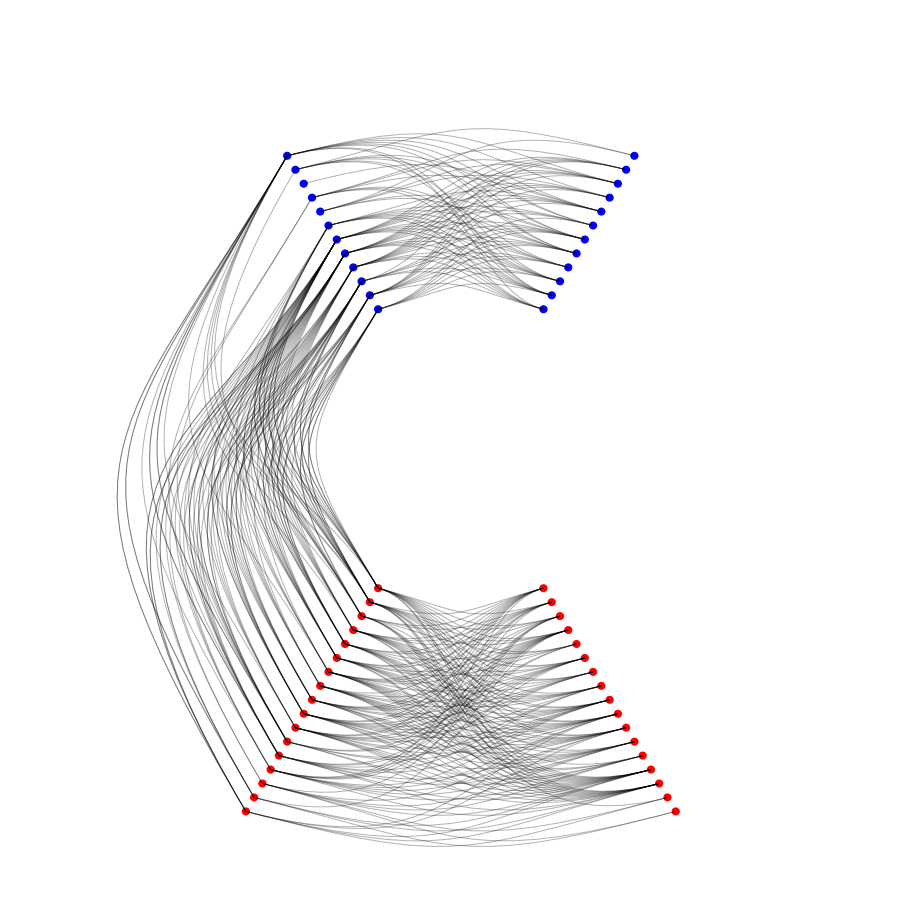

In [33]:
h = HivePlot(nodes, edges, nodes_cmap, edges_cmap)
h.draw()
# note that it makes visualization on between-group and with-in-group member really easy

As you can see, with Hive Plots,
we first group nodes along two or three radial axes.
In this case, we have the boys along one radial axis
and the girls along the other.
We can also order the nodes along each axis if we so choose to.
In this case, no particular ordering is chosen.

Next, we draw edges.
We start first with edges _between_ groups.
That is shown on the left side of the figure,
joining nodes in the "yellow" and "green" (boys/girls) groups.
We then proceed to edges _within_ groups.
This is done by cloning the node radial axis
before drawing edges.

## Principles of Rational Graph Viz

While I was implementing these visualizations in `nxviz`,
I learned an important lesson in implementing graph visualizations in general:

> To be most informative and communicative,
> a graph visualization should first prioritize node placement
> in a fashion that makes sense.

In some ways, this makes a ton of sense.
The nodes are the "entities" in a graph,
corresponding to people, proteins, and ports.
For "entities", we have natural ways to group, order and summarize (reduce).
(An example of a "reduction" is counting the number of things.)
Prioritizing node placement allows us
to appeal to our audience's natural sense of grouping, ordering and reduction.

So the next time you see a hairball,
I hope you're able to critique it for what it doesn't communicate,
and possibly use the same principle to design a better visualization!